In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import os
print(os.listdir("../input"))
plt.rcParams['figure.figsize'] = (12.0, 8.0) 
plt.rcParams['figure.dpi'] = 300 
# Any results you write to the current directory are saved as output.

['emails.csv', 'questions.csv', 'professionals.csv', 'comments.csv', 'tag_users.csv', 'group_memberships.csv', 'tags.csv', 'students.csv', 'groups.csv', 'tag_questions.csv', 'matches.csv', 'answers.csv', 'school_memberships.csv']


In [2]:
dataStudent = pd.read_csv('../input/students.csv',encoding='utf-8')
dataTeacher = pd.read_csv('../input/professionals.csv',encoding='utf-8')

#  Understanding of data

In [3]:
dataTeacher.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [4]:
dataStudent.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00 UTC+0000
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00 UTC+0000


In [5]:
dataStudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
students_id             30971 non-null object
students_location       28938 non-null object
students_date_joined    30971 non-null object
dtypes: object(3)
memory usage: 726.0+ KB


In [6]:
dataTeacher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28152 entries, 0 to 28151
Data columns (total 5 columns):
professionals_id             28152 non-null object
professionals_location       25054 non-null object
professionals_industry       25576 non-null object
professionals_headline       26085 non-null object
professionals_date_joined    28152 non-null object
dtypes: object(5)
memory usage: 1.1+ MB


# Simple processing of data

### Separate individual labels

In [7]:
dataStudentLoc = dataStudent['students_location']
dataStudentDat = dataStudent['students_date_joined']
dataTeacherLoc = dataTeacher['professionals_location']
dataTeacherInd = dataTeacher['professionals_industry']
dataTeacherHea = dataTeacher['professionals_headline']
dataTeacherDat = dataTeacher['professionals_date_joined']
dataStudentDat

0        2011-12-16 14:19:24 UTC+0000
1        2011-12-27 03:02:44 UTC+0000
2        2012-01-01 05:00:00 UTC+0000
3        2012-01-01 05:00:00 UTC+0000
4        2012-01-01 05:00:00 UTC+0000
5        2012-01-01 05:00:00 UTC+0000
6        2012-01-01 05:00:00 UTC+0000
7        2012-01-01 05:00:00 UTC+0000
8        2012-01-01 05:00:00 UTC+0000
9        2012-01-01 05:00:00 UTC+0000
10       2012-01-01 05:00:00 UTC+0000
11       2012-01-01 05:00:00 UTC+0000
12       2012-01-01 05:00:00 UTC+0000
13       2012-01-01 05:00:00 UTC+0000
14       2012-01-01 05:00:00 UTC+0000
15       2012-01-01 05:00:00 UTC+0000
16       2012-01-01 05:00:00 UTC+0000
17       2012-01-01 05:00:00 UTC+0000
18       2012-01-01 05:00:00 UTC+0000
19       2012-01-01 05:00:00 UTC+0000
20       2012-01-01 05:00:00 UTC+0000
21       2012-01-01 05:00:00 UTC+0000
22       2012-01-01 05:00:00 UTC+0000
23       2012-01-01 05:00:00 UTC+0000
24       2012-01-01 05:00:00 UTC+0000
25       2012-01-01 05:00:00 UTC+0000
26       201

### Missing value processing

In [8]:
dataStudentLoc = dataStudentLoc.dropna(how='any')
dataTeacherLoc = dataTeacherLoc.dropna(how='any')
dataTeacherInd = dataTeacherInd.dropna(how='any')
dataTeacherHea = dataTeacherHea.dropna(how='any')
dataStudentLoc

59                              Wayne, Pennsylvania
78                               New York, New York
97                                   Lakewood, Ohio
104                              New York, New York
111                         London, Ontario, Canada
124                          Burlingame, California
134                       San Francisco, California
136                                  Tempe, Arizona
142                           Boston, Massachusetts
147                            Palm Harbor, Florida
150                          Baton Rouge, Louisiana
152                           Sunnyvale, California
153                        Worcester, Massachusetts
155                              Irvine, California
157                                   United States
159                          Burlingame, California
163                             Hinesville, Georgia
165                                     Katy, Texas
168                                Phoenix, Arizona
170         

### Define simple functions and complete classification statistics to synthesize new arrays

In [9]:
def sorted(dataset):
    datasetNum = dataset.value_counts()
    datasetLab = dataset.unique()
    
    return np.column_stack((datasetLab,datasetNum))
    
# dataStudentLocNum = dataStudentLoc.value_counts()
# dataStudentLocLab = dataStudentLoc.unique()
# studentLoc = np.column_stack((dataStudentLocLab,dataStudentLocNum))
studentLoc = sorted(dataStudentLoc)
teacherLoc = sorted(dataTeacherLoc)
teacherInd = sorted(dataTeacherInd)
teacherHea = sorted(dataTeacherHea)
teacherInd

array([['Special Events', 3166],
       ['education, tech, media', 2109],
       ['Renewable energy', 1272],
       ...,
       ['Dev Sec Ops', 1],
       ['Electrical engineering Computer Software', 1],
       ['Mobility and Entertainment', 1]], dtype=object)

### Slice the date, accurate to the year, you can also choose the month. At the same time, you can also process it by converting it to a date object in pandas.

In [10]:
def cutDate(dataset):
    for i in range(len(dataset)):
        dataset[i] = dataset[i][:4]
        
    return dataset

studentDat = cutDate(dataStudentDat)
teacherIDat = cutDate(dataTeacherDat)
studentDat

0        2011
1        2011
2        2012
3        2012
4        2012
5        2012
6        2012
7        2012
8        2012
9        2012
10       2012
11       2012
12       2012
13       2012
14       2012
15       2012
16       2012
17       2012
18       2012
19       2012
20       2012
21       2012
22       2012
23       2012
24       2012
25       2012
26       2012
27       2012
28       2012
29       2012
         ... 
30941    2019
30942    2019
30943    2019
30944    2019
30945    2019
30946    2019
30947    2019
30948    2019
30949    2019
30950    2019
30951    2019
30952    2019
30953    2019
30954    2019
30955    2019
30956    2019
30957    2019
30958    2019
30959    2019
30960    2019
30961    2019
30962    2019
30963    2019
30964    2019
30965    2019
30966    2019
30967    2019
30968    2019
30969    2019
30970    2019
Name: students_date_joined, Length: 30971, dtype: object

### Sorting and categorizing years by collections

In [11]:
from collections import Counter
studentDat = Counter(studentDat)
teacherIDat = Counter(teacherIDat)
teacherIDat

Counter({'2011': 57,
         '2012': 222,
         '2013': 429,
         '2014': 987,
         '2015': 1540,
         '2016': 5618,
         '2017': 6322,
         '2018': 11572,
         '2019': 1405})

# Drawing graphics

### Separate X, Y from Counter

### Student's address distribution top ten

In [12]:
studentx = studentLoc[:,1]
studenty = studentLoc[:,0]
studenty[:9]

array(['Wayne, Pennsylvania', 'New York, New York', 'Lakewood, Ohio',
       'London, Ontario, Canada', 'Burlingame, California',
       'San Francisco, California', 'Tempe, Arizona',
       'Boston, Massachusetts', 'Palm Harbor, Florida'], dtype=object)

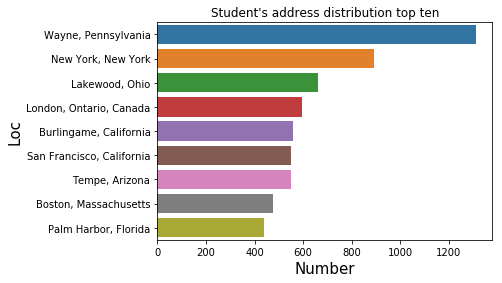

In [13]:
sns.barplot(studentx[:9],studenty[:9])
plt.xlabel("Number",fontsize=15)
plt.ylabel("Loc",fontsize=15)
plt.title("Student's address distribution top ten")
plt.show()

### Teacher's address distribution top ten

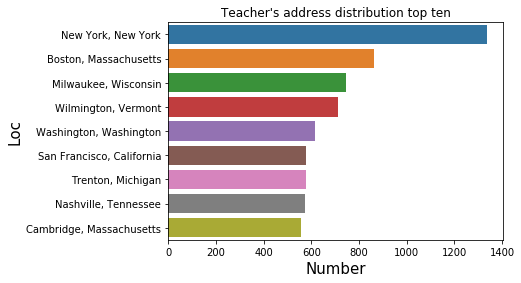

In [14]:
teacherx = teacherLoc[:,1]
teachery = teacherLoc[:,0]
sns.barplot(teacherx[:9],teachery[:9])
plt.title("Teacher's address distribution top ten")
plt.xlabel("Number",fontsize=15)
plt.ylabel("Loc",fontsize=15)
plt.show()

### Line chart showing the increase in the number of students and teachers per year

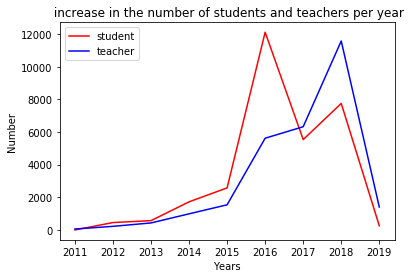

In [15]:
studentDatX = studentDat.keys()
studentDatY = studentDat.values()
teacherDatX = teacherIDat.keys()
teacherDatY = teacherIDat.values()
plt.plot(studentDatX,studentDatY,'r',label='student')
plt.plot(teacherDatX,teacherDatY,'b',label='teacher')
plt.title(" increase in the number of students and teachers per year")
plt.xlabel('Years')
plt.ylabel('Number')
plt.legend()
plt.show()

### Pie chart of professionals_industry

In [16]:
teacherInd

array([['Special Events', 3166],
       ['education, tech, media', 2109],
       ['Renewable energy', 1272],
       ...,
       ['Dev Sec Ops', 1],
       ['Electrical engineering Computer Software', 1],
       ['Mobility and Entertainment', 1]], dtype=object)

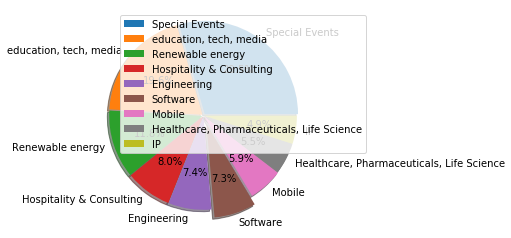

In [17]:
teacherIndlab = teacherInd[:,0]
teacherIndnum = teacherInd[:,1]
explode = (0.02,0.015,0.012,0.010,0.01,0.1,0.005,0,0)
plt.pie(teacherIndnum[:9],labels=teacherIndlab[:9],explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.legend()
 
plt.show()
# teacherIndlab

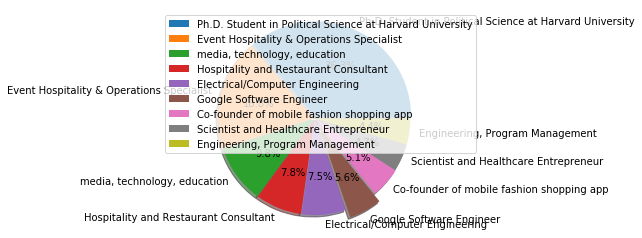

In [18]:
teacherHealab = teacherHea[:,0]
teacherHeanum = teacherHea[:,1]
explode = (0.02,0.015,0.012,0.010,0.01,0.1,0.005,0,0)
plt.pie(teacherHeanum[:9],labels=teacherHealab[:9],explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.legend()
 
plt.show()
# teacherHealab


    This is my first time posting a work on kaggle. This work is to help you learn machine learning by extracting various data and merging new array objects. After that, I will continue to explore the content of the remaining data sets, and at the end look for interesting questions and build model predictions or classifications to solve the problem.
    Here, I am very willing to communicate with you and build friendships and even team up.
    thank you all.